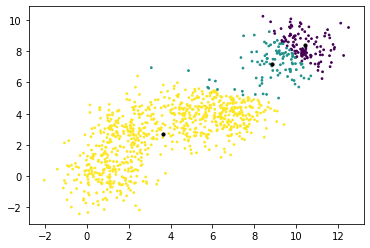

[[10.409667    8.40230934]
 [ 8.84254257  7.17194927]
 [ 3.65629844  2.676652  ]]


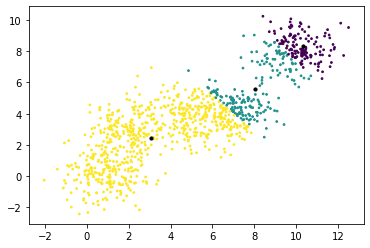

[[10.31320493  8.33449314]
 [ 8.01731345  5.5940213 ]
 [ 3.09130612  2.42219669]]


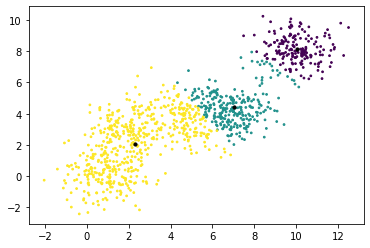

[[10.04114667  8.14958667]
 [ 7.01229773  4.45049311]
 [ 2.32556552  2.07279569]]


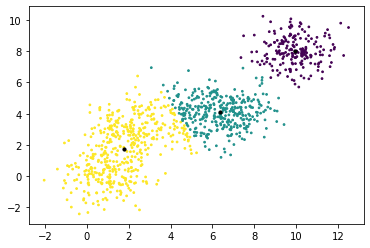

[[9.91962822 8.0153303 ]
 [6.3624995  4.11351593]
 [1.76406173 1.73009967]]


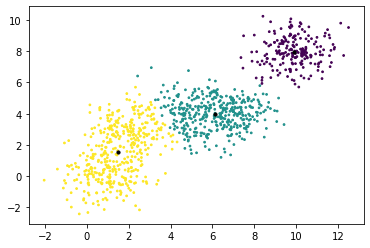

[[9.8750787  7.97315443]
 [6.10589699 4.00338613]
 [1.50375172 1.55846406]]


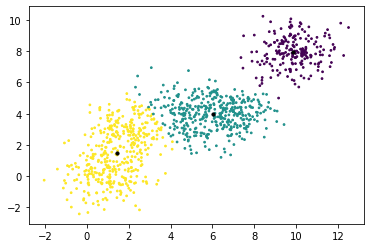

[[9.86359283 7.94779039]
 [6.00343627 3.99049163]
 [1.44265064 1.4851275 ]]


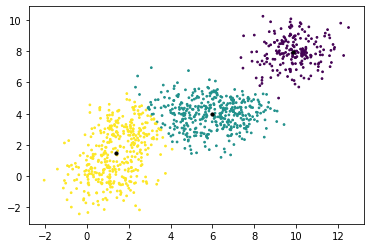

[[9.86359283 7.94779039]
 [5.96360005 3.98406292]
 [1.41388703 1.45367733]]


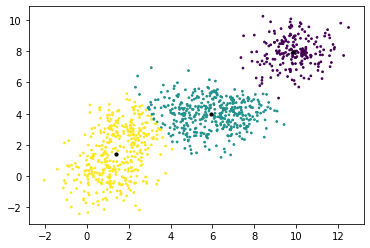

[[9.86359283 7.94779039]
 [5.94991246 3.982437  ]
 [1.4047923  1.44249579]]


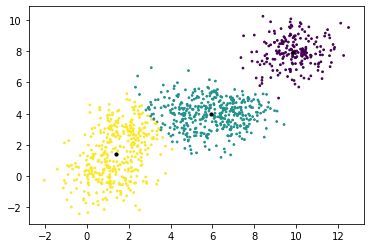

[[9.86359283 7.94779039]
 [5.92916937 3.98017513]
 [1.39145811 1.42535639]]


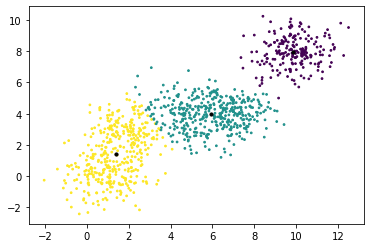

[[9.86359283 7.94779039]
 [5.92275312 3.9786312 ]
 [1.38651889 1.4204168 ]]


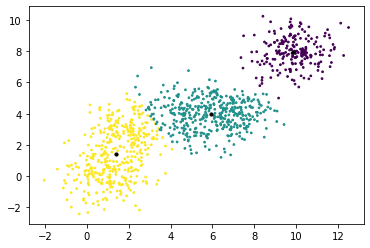

[[9.86359283 7.94779039]
 [5.91680725 3.97618197]
 [1.38109391 1.41640928]]


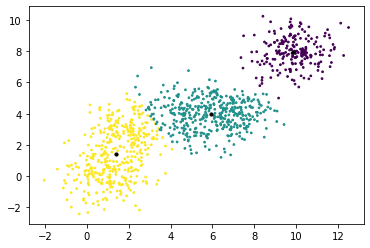

[[9.86359283 7.94779039]
 [5.91680725 3.97618197]
 [1.38109391 1.41640928]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

def create_data():
    X,y = datasets.make_blobs(n_samples=1000,n_features=2,centers=[[1,0],[5,4],[2,3],[10,8],[7,4]])
    return X,y

def init_centers(data,k):
    m, n =data.shape
    # m 样本个数，n特征个数
    center_ids = np.random.choice(m,k)
    centers = data[center_ids]
    return centers

def cal_dist(ptA,ptB):
   return np.linalg.norm(ptA-ptB)

def kmeans_process(data,k):
    centers = init_centers(data, k)
    m, n = data.shape
    keep_changing = True
    pred_y = np.zeros((m,))

    while keep_changing:
        keep_changing = False
        # 计算剩余样本所属类别
        for i in range(m):
            min_distance = np.inf
            for center in range(k):
                distance = cal_dist(data[i,:],centers[center,:])
                if distance<min_distance: # 判断离哪个更近
                    min_distance = distance
                    idx = center # 类别换下
            if pred_y[i] != idx:   # 判断是否发生了改变
                keep_changing = True
            pred_y[i] = idx
        # 更新类别中心点坐标
        for center in range(k):
            cluster_data = data[pred_y==center]
            centers[center,:] = np.mean(cluster_data, axis=0) # 求相同类别数据点的质心点
        plt.scatter(X[:,0], X[:,1], s=3, c=pred_y)
        plt.scatter(centers[:,0], centers[:,1], s=10, c='k')
        plt.show()
        print(centers)
    return centers, pred_y

if __name__ == '__main__':
    X, y = create_data()
    centers , pred_y = kmeans_process(data=X, k=3)
    